In [2]:
import numpy as np
import matplotlib.pyplot as plt
from parameters import default_parameters


In [3]:
import import_ipynb
from utils import fast_fourier_transform, inverse_fast_fourier_transform

importing Jupyter notebook from utils.ipynb


In [1]:
class Channel(object):
    
    @staticmethod
    def channel_linear_part(t, x, dz, beta):
        dt = t[1] - t[0]
        T = t[-1] - t[0]
        F = 1/dt
        df = 1/T
        
        f = np.arange(-F/2, (F/2) +df/2, df)
        omega = 2*np.pi*np.fft.fftshift(f)

        data_f = np.fft.fft(x)
        linear_y = np.fft.ifft(data_f * np.exp(-1j*(beta/2)*dz*(omega)**2))
        return linear_y
    
    @staticmethod
    def channel_non_linear_part(x, dz, gamma):
        
        non_linear_y = x*np.exp(-1j*gamma*dz*np.abs(x)**2)
        return non_linear_y
    
    @staticmethod
    def channel_noise(x, noise_sigma_pow_2):
        data_size = (x.shape[0],1)
        noise = np.sqrt(noise_sigma_pow_2 / 2) * (np.random.rand(*data_size) + 1j*np.random.rand(*data_size))
        noisy_y = x + noise
        return noisy_y
    
    @staticmethod
    def generate(t, x, z, nz, gamma, beta2, noise_sigma_pow_2):
        dz = z / nz
        
        for _ in np.arange(nz):
            x = Channel.channel_linear_part(t, x, dz, beta2)
            x = Channel.channel_non_linear_part(x, dz, gamma)
            x = Channel.channel_noise(x, noise_sigma_pow_2)
        return x
        
    

amplitude: 1
peak x_0: 1.0
peak x_z: 1.1196582483331148
ratio: 0.8931296683508068


peak x_0_f: 32.08484191527681
peak x_z_f: 186.0440990246977
ratio: 0.17245826168889933


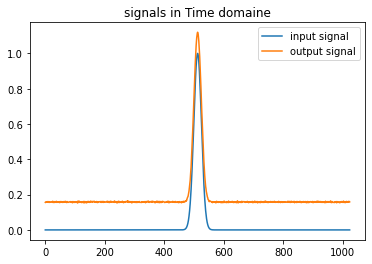

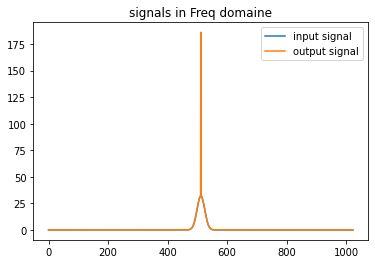

In [7]:
if __name__ == '__main__':
    s = .5
    amplitute = 1
    
    noise_sigma_pow_2 =  1*1e-7
    
    T = 40
    N = 2**10
    dt = T/N
    t = np.arange(-T/2, T/2, dt)
    
    x_0 = amplitute*np.exp(-t**2/s) 
    #x_0 = amplitute*(1/np.cosh(t))
    z = 1
    
    nz = 1000
    gamma = 2
    #noise_sigma_pow_2 = default_parameters['sigma_pow_2']['value'] 
    gamma = default_parameters['gamma']['value']
    beta2 = default_parameters['beta_2']['value']
    
    x_z = Channel.generate(t, x_0, z, nz, gamma, beta2, noise_sigma_pow_2)
    
    x_0_f = fast_fourier_transform(x_0)
    x_0_f = np.fft.fftshift(np.fft.fft(x_0))
    x_z_f = fast_fourier_transform(x_0)
    x_z_f = np.fft.fftshift(np.fft.fft(x_z))
    
    
    print('amplitude:',amplitute )
    print('peak x_0:', np.max(np.abs(x_0)))
    print('peak x_z:', np.max(np.abs(x_z)))
    print('ratio:',np.max(np.abs(x_0)) / np.max(np.abs(x_z)), end='\n\n\n')
    
    print('peak x_0_f:', np.max(np.abs(x_0_f)))
    print('peak x_z_f:', np.max(np.abs(x_z_f)))
    print('ratio:',np.max(np.abs(x_0_f)) / np.max(np.abs(x_z_f)))
    
    plt.plot(np.abs(x_0))
    plt.plot(np.abs(x_z))
    plt.legend(['input signal', 'output signal'])
    plt.title('signals in Time domaine')
    plt.show()
    plt.plot(np.abs(x_0_f))
    plt.plot(np.abs(x_z_f))
    plt.legend(['input signal', 'output signal'])
    plt.title('signals in Freq domaine')
    plt.show()
    